In [2]:
%matplotlib notebook

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
import colorsys

import imageio
#from PIL import Image

In [237]:
def waterfall(X, Y, Z, nslices):
  """
  X: rows are independent axis of each timeseries
  Y: each row is identically equal to the number of the timeseries
  Z: rows are equal to dependent axis of each timeseries
  """
  #http://amoreperfectvacuum.blogspot.com/2015/10/a-simple-waterfall-plot-in-python.html

  # Function to generate formats for facecolors
  cc = lambda arg: colorConverter.to_rgba(colorsys.hsv_to_rgb(arg, 1.0,1.0), alpha=0.8)
  # This is just wrong. There must be some way to use the meshgrid or why bother.
  verts = []
  N = float(nslices)
  for i in range(nslices):
    verts.append(list(zip(X[i], Z[i])))

  xmin = np.floor(np.min(X))
  xmax = np.ceil(np.max(X))
  ymin = np.floor(np.min(Y))
  ymax = np.ceil(np.max(Y))
  zmin = np.floor(np.min(Z.real))
  zmax = np.ceil(np.max(np.abs(Z)))

  fig=plt.figure()
  ax = Axes3D(fig)
 
  poly = PolyCollection(verts, facecolors=[cc(i/N) for i,v in enumerate(verts)])
  ax.add_collection3d(poly, zs=np.arange(0,nslices), zdir='y')
  ax.set_xlim(xmin,xmax)
  ax.set_ylim(ymin,ymax)
  ax.set_zlim(zmin,zmax)
  plt.show()


<IPython.core.display.Javascript object>


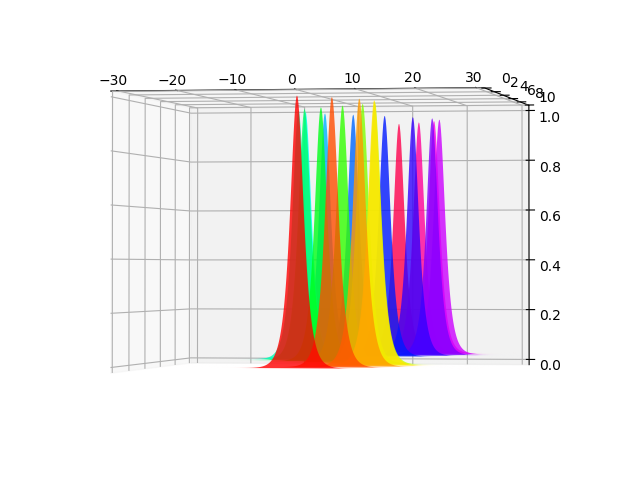

In [238]:
# example usage
T = 60.
n = 512
t = np.linspace(-T/2., T/2., n+1)
t = t[0:n]
# There's a function to set up the frequencies, but doing it by hand seems to help me think 
# things through.
k = np.array([(2. * np.pi)*i if i < n/2 else (2. * np.pi) * (i - n) 
  for i in range(n)])

ks = np.fft.fftshift(k)
slc = np.arange(0, 10, 0.5)
# I haven't quite figured out how to use the meshgrid function in numpy
T, S = np.meshgrid(t, slc)
K, S = np.meshgrid(k, slc)

# Now, we have a plane flying back and forth in a sine wave and getting painted by a radar pulse
# which is a hyperbolic secant (1/cosh)
U = 1./np.cosh(T - 10. * np.sin(S)) * np.exp(1j * 0. * T)
waterfall(T, S, U.real, len(slc))

In [251]:
arr = np.load('/scratch0/ilya/locDoc/MaryGAN/experiments/waterfall.npy')

In [252]:
len(arr)

166

<IPython.core.display.Javascript object>


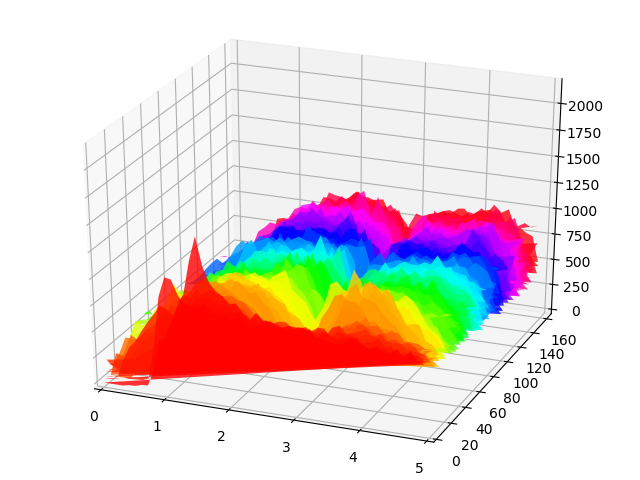

In [253]:
U = arr[1:,::]
bins = np.arange(0,5.0,0.1)
T = np.tile(bins,(U.shape[0],1))
S = np.tile(np.arange(0,U.shape[0]), (len(bins),1)).T
waterfall(T, S, U, U.shape[0])

## make video

In [11]:
o_frames = np.load('/scratch0/ilya/locDoc/MaryGAN/experiments/hist2d.npy')

In [12]:
len(o_frames)

2085

In [13]:
frames = o_frames
frames /= (np.expand_dims(np.expand_dims(frames.max(axis=(1,2)), -1),-1))
frames *= 255

In [14]:
frames = frames.astype(np.uint8)
frames = np.swapaxes(frames, 1,2)
frames = frames[:,::-1,:]
imageio.mimsave('../docs/figures/actual.gif', frames)

In [170]:
pwd

'/cfarhomes/ilyak/ilyakavalerov@gmail.com/ramawks69/marygan/notebooks'